In [1]:
import PIL
from PIL import Image
import glob
import numpy as np
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

#print("Pillow Version: ", PIL.__version__)


2023-05-13 22:53:32.277365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/New_Batteries"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

batteries_array = np.array(images)/255

In [3]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Resistors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

resistors_array = np.array(images)/255

In [4]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Capacitors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

capacitor_array = np.array(images)/255

In [5]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Inductors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

inductors_array = np.array(images)/255

In [6]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/Training_Data/Resized_Data/Ground"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

ground_array = np.array(images)/255

print(np.shape(ground_array))

(210, 56, 56)


In [7]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/MishayTrisData/Resized"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

images = np.array(images)/255

In [8]:
#print(np.shape(ground_array))
labels = ['Ground', 'Resistor', 'Inductor', 'Capacitor', 'Battery']


In [10]:
ground_label = np.zeros(210)
resistor_label = np.ones(210)
inductor_label = 2*np.ones(210)
capacitor_label = 3*np.ones(210)
battery_label = 4*np.ones(210)

In [11]:
ground_array = list(zip(ground_array,ground_label))
resistors_array = list(zip(resistors_array, resistor_label))
inductors_array = list(zip(inductors_array, inductor_label))
capacitor_array = list(zip(capacitor_array, capacitor_label))
batteries_array = list(zip(batteries_array, battery_label))

print(np.shape(ground_array))

(210, 2)


/Users/danieljones/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [12]:
data_with_labels = np.concatenate((ground_array,resistors_array,inductors_array,capacitor_array,batteries_array))
print(np.shape(data_with_labels))

(1050, 2)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [133]:
#random.shuffle(data_with_labels)

In [13]:
shuffled_data, shuffled_labels = zip(*data_with_labels)

In [14]:
print(np.shape(shuffled_data))
train_data,test_data,train_labels,test_labels = train_test_split(shuffled_data, shuffled_labels, test_size = 0.2)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.1)



(1050, 56, 56)


In [15]:
def plot_sample(X,y,index,Labels):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Labels[int(y[index])])
    

[1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 0.0, 1.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 0.0, 4.0, 2.0, 2.0, 2.0, 4.0, 0.0, 3.0, 2.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 2.0, 3.0, 2.0, 0.0, 0.0, 3.0, 3.0, 2.0, 0.0, 3.0, 0.0, 2.0, 3.0, 0.0, 1.0, 0.0, 4.0, 3.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 1.0, 0.0, 1.0, 2.0, 4.0, 3.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 4.0, 1.0, 1.0, 4.0, 1.0, 3.0, 3.0, 4.0, 1.0, 0.0, 4.0, 1.0, 0.0, 4.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 4.0, 0.0, 4.0, 3.0, 0.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 0.0, 4.0, 1.0, 3.0, 4.0, 1.0, 3.0, 4.0, 3.0, 0.0, 3.0, 1.0, 0.0, 2.0, 3.0, 3.0, 4.0, 0.0, 3.0, 2.0, 2.0, 0.0, 3.0, 0.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 0.0, 1.0, 1.0, 1.0, 1.0, 4.0, 3.0, 0.0, 2.0, 3.0, 0.0, 1.0, 0.0, 2.0, 1.0, 3.0, 1.0, 3.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 0.0, 3.0, 4.0, 0.0, 4.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 4.0,

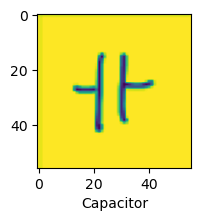

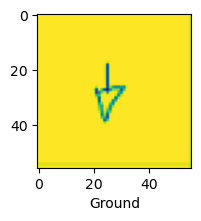

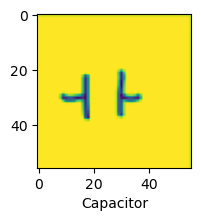

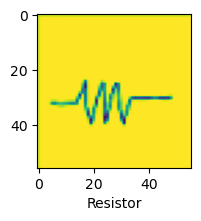

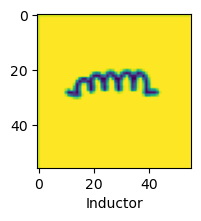

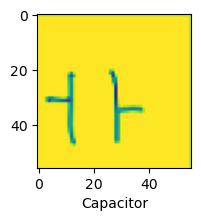

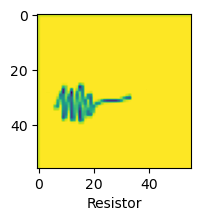

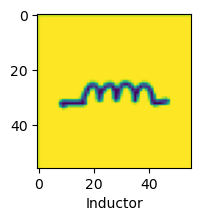

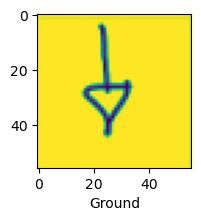

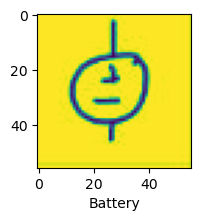

In [16]:
print(train_labels)
count = 0
for i in train_labels:

    if i == 4:
        count+=1
print(count)


for i in range(110,120):

    plot_sample(train_data,train_labels,i,labels)

In [20]:
fox = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(56,56,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 4, kernel_size = (3,3), activation = 'relu', input_shape=(56,56,1)),
    layers.MaxPooling2D((2,2)),



    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')


])

In [21]:
fox.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
train_data = np.asarray(train_data)
train_labels = np.asarray(train_labels)

fox.fit(train_data,train_labels,epochs = 20)

Epoch 1/20
24/24 [==============================] - 4s 69ms/step - loss: 1.6121 - accuracy: 0.2116
Epoch 2/20
24/24 [==============================] - 2s 73ms/step - loss: 1.5936 - accuracy: 0.2222
Epoch 3/20
24/24 [==============================] - 2s 71ms/step - loss: 1.4482 - accuracy: 0.4775
Epoch 4/20
24/24 [==============================] - 2s 69ms/step - loss: 0.9786 - accuracy: 0.6865
Epoch 5/20
24/24 [==============================] - 2s 65ms/step - loss: 0.7213 - accuracy: 0.7566
Epoch 6/20
24/24 [==============================] - 2s 68ms/step - loss: 0.6151 - accuracy: 0.7698
Epoch 7/20
24/24 [==============================] - 2s 71ms/step - loss: 0.5343 - accuracy: 0.8254
Epoch 8/20
24/24 [==============================] - 2s 71ms/step - loss: 0.4976 - accuracy: 0.8201
Epoch 9/20
24/24 [==============================] - 2s 70ms/step - loss: 0.4445 - accuracy: 0.8532
Epoch 10/20
24/24 [==============================] - 2s 70ms/step - loss: 0.4118 - accuracy: 0.8611
Epoch 11/

In [177]:
fox.evaluate(train_data,train_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.0727 - accuracy: 0.9987


[0.0726669579744339, 0.9986772537231445]

In [23]:
val_data = np.asarray(val_data)
val_labels = np.asarray(val_labels)
fox.evaluate(val_data,val_labels)

3/3 [==============================] - 1s 36ms/step - loss: 0.2120 - accuracy: 0.9048


[0.21196238696575165, 0.9047619104385376]

In [24]:
test_data = np.asarray(test_data)
test_labels = np.asarray(test_labels)
fox.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 19ms/step - loss: 0.4072 - accuracy: 0.8952


[0.4071696400642395, 0.8952381014823914]

In [150]:
#fox.save('Model4_Daniel_GNDfixed')

INFO:tensorflow:Assets written to: Model4_Daniel_GNDfixed/assets


INFO:tensorflow:Assets written to: Model4_Daniel_GNDfixed/assets


In [25]:
#testing model

#loaded_model = models.load_model('Model3_Daniel')

predictions = fox.predict(train_data)





24/24 [==============================] - 1s 25ms/step


In [23]:
#print(predictions)

[[9.9997562e-01 5.1945642e-10 1.3784498e-15 2.3721347e-09 2.4309720e-05]
 [9.9999446e-01 1.5103588e-09 9.0589062e-16 3.6201456e-08 5.4615671e-06]
 [1.3554170e-08 1.3777412e-02 9.8621219e-01 1.0232811e-05 1.6999726e-07]
 ...
 [9.9999976e-01 2.6829382e-13 4.0612533e-10 1.0985617e-07 1.4721608e-07]
 [9.9999762e-01 1.1316288e-09 1.0373591e-18 2.5350810e-10 2.3731700e-06]
 [9.9824500e-01 2.4584941e-05 7.2738388e-10 6.8255620e-05 1.6620866e-03]]


In [26]:
est_y = np.zeros(len(train_data))
for i in range(len(train_data)):

    for j in range(4):

        if predictions[i][j]>0.8:
           
            est_y[i] = j; 

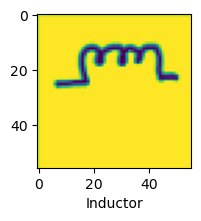

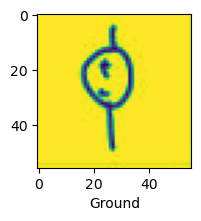

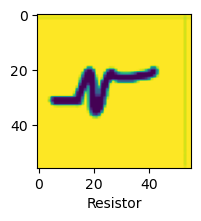

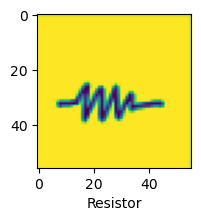

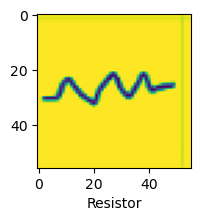

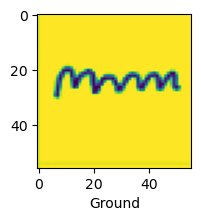

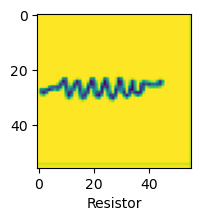

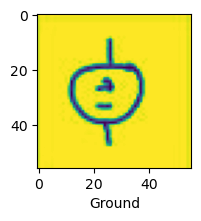

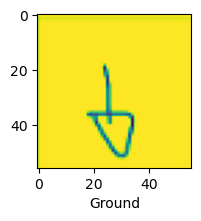

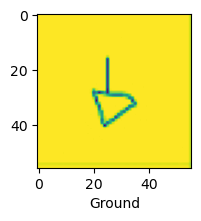

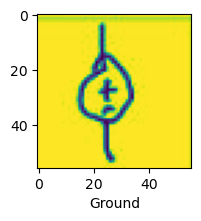

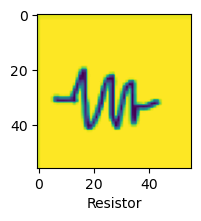

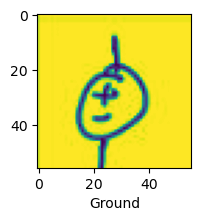

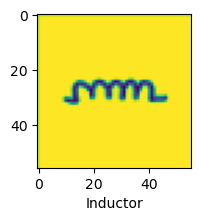

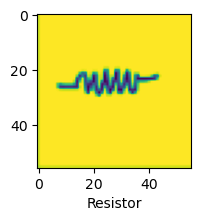

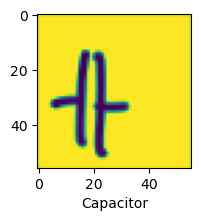

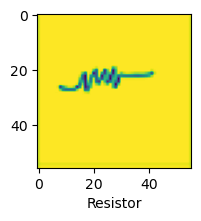

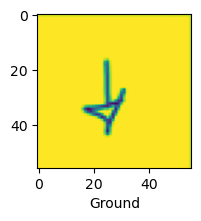

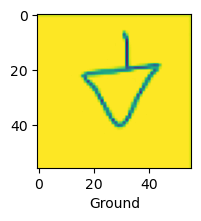

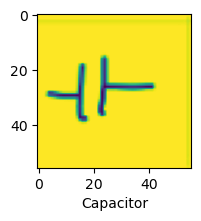

In [31]:
for i in range(210,230):

    plot_sample(train_data,est_y,i,labels)